# Classification Algorithms

This chapter looks at different machine learning classification algorithms, how to use the scikit-learn library to implement them and also what their individual strenghts and weaknesses are.

**`The following scikit-learn algorithms would be used`**
>    
    1. Perceptron
    2. Logistic Regression

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set_style('darkgrid')

In [4]:
# loading the data and seperating them into features and labels
iris = load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print(f'Label Class : {np.unique(y)}')

Label Class : [0 1 2]


In [5]:
# label names 
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X.shape, y.shape

((150, 2), (150,))

In [7]:
# splitting the features and label into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [8]:
print(f'Label counts in y : {np.bincount(y)}')
print(f'Label counts in y_train : {np.bincount(y_train)}')
print(f'Label counts in y_test : {np.bincount(y_test)}')

Label counts in y : [50 50 50]
Label counts in y_train : [35 35 35]
Label counts in y_test : [15 15 15]


In [9]:
# scaling the features
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled  = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [78]:
# fitting the data to a learning model
ppn = Perceptron(random_state=1, eta0=0.1).fit(X_train_scaled, y_train)
y_preds = ppn.predict(X_test_scaled)
print(f'Missclassified classses {(y_test !=y_preds).sum()}')

Missclassified classses 1


In [66]:
# Accuracy score
print(f'Accuracy score : {round(accuracy_score(y_test, y_preds), 3)}')

Accuracy score : 0.978


In [67]:
round(ppn.score(X_test_scaled,y_test), 3)

0.978

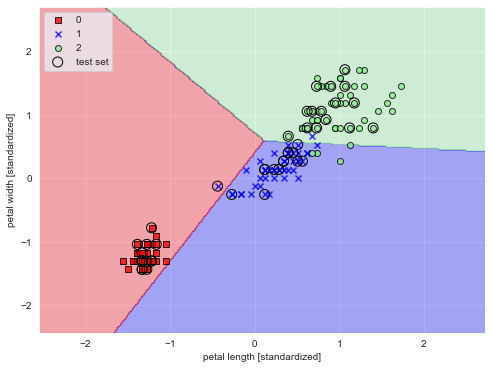

In [79]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set') 

X_combined = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))

fig, ax = plt.subplots( figsize=(8,6))
plot_decision_regions(X_combined, y_combined, ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


its biggest disadvantage is that it never
converges if the classes are not perfectly linearly separable

# Logistic Regression 

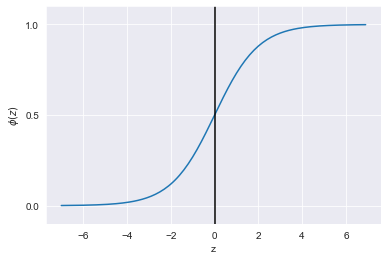

In [102]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')

plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])

plt.show()